# Crop, filter and segment

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
# Import the local package. 
from brain_segmentations.segmentation.segmentation import *

In [59]:
ROOT = 'Z://Collaboration_data/Iordonova_lab/'


img_identifier = '347890_408640_057040'
fos_path = ROOT + '/fos_' +img_identifier+'.tif'
neun_path =  ROOT + '/neun_' +img_identifier+'.tif'
# img1_crop, img2_crop = load_and_display_tiffs(neun_path, fos_path)

fos_img = io.imread(fos_path).astype(np.int32) 
neun_img = io.imread(neun_path).astype(np.int32) 

0 0


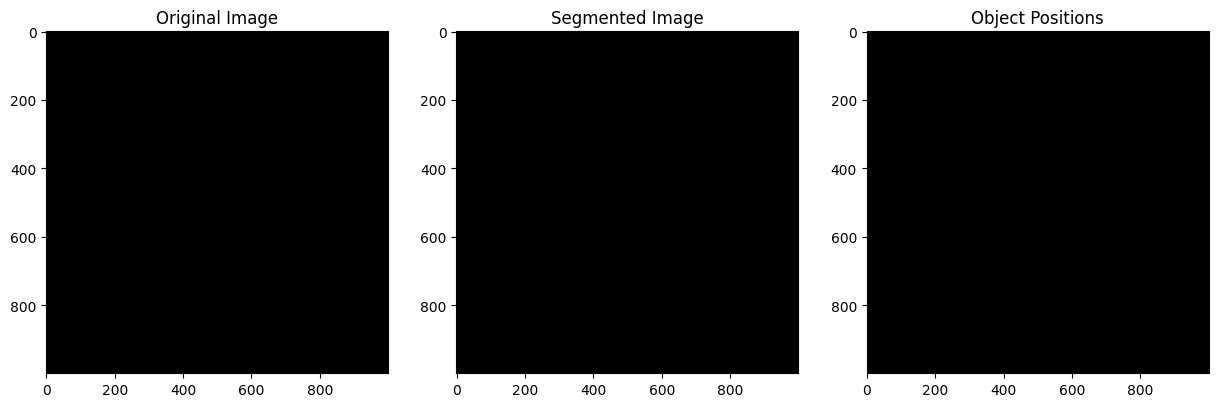

0 0


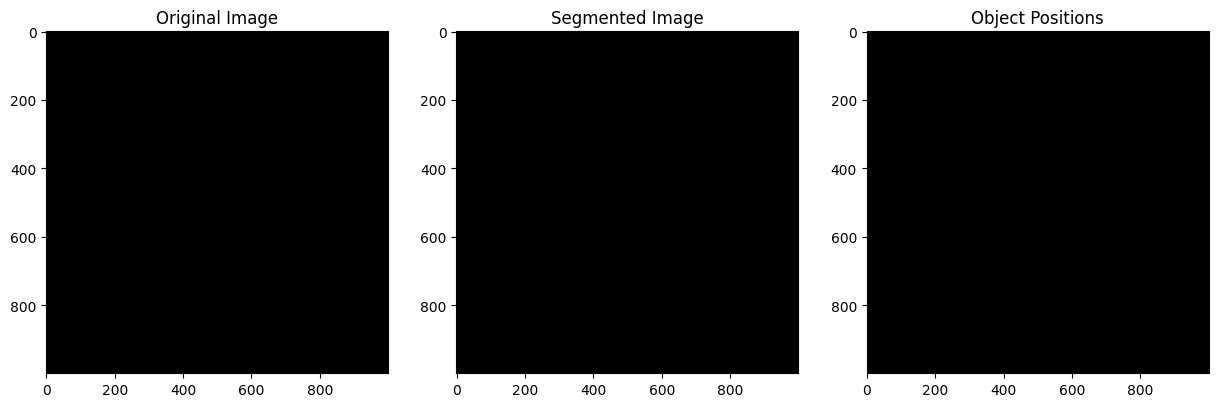

0 0


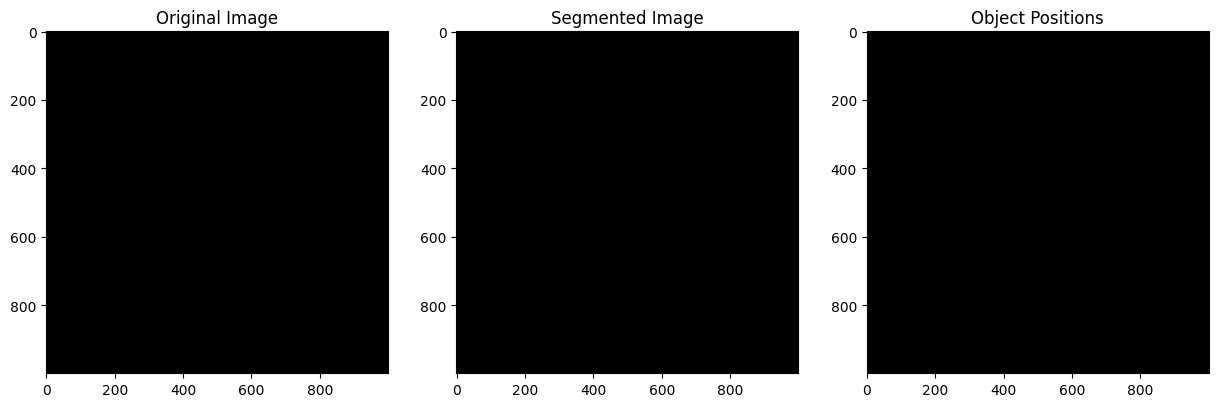

0 4645


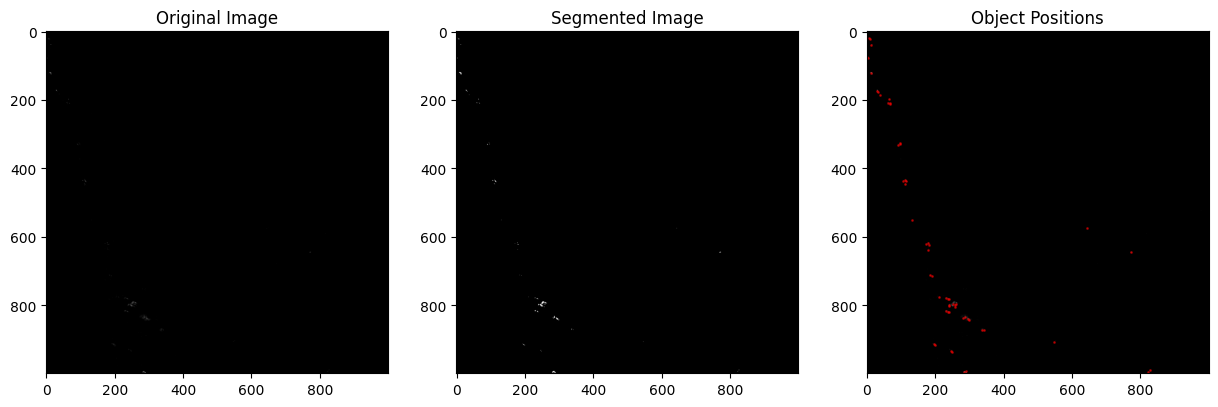

0 12943


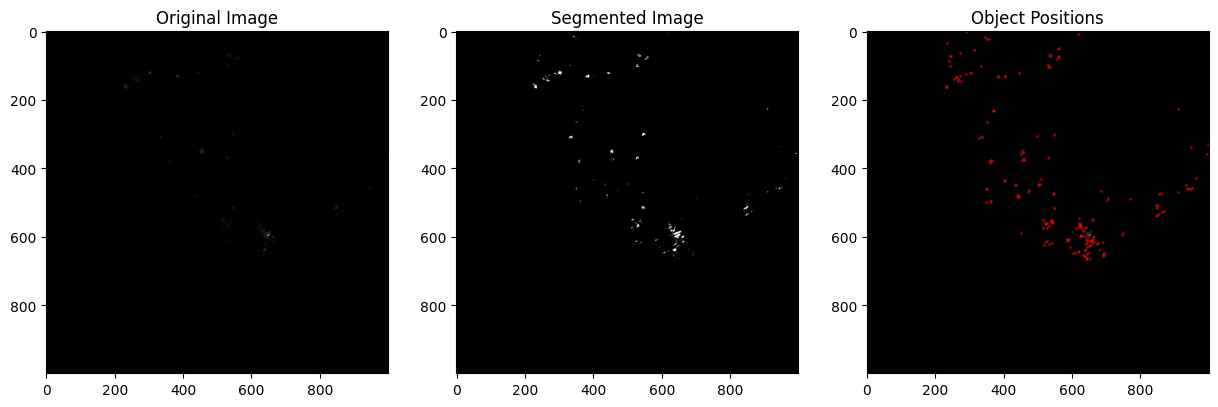

0 15035


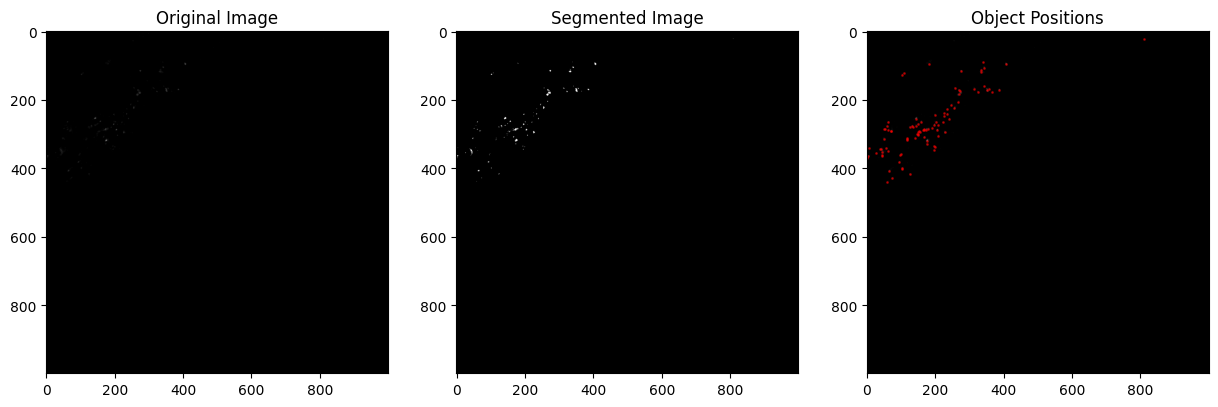

In [65]:
'''Need to find settings where none are detcted in 157
And tyhey are dtected in 105, 116, 117'''

test_img_list = [0,1,157, 105, 116, 117]

for i_img in test_img_list:
    
    img = neun_stack[i_img]
    print(np.min(img), np.max(img))
    processing_pipeline(img)

# Build the pipeline

##### Imports 

In [3]:
import numpy as np
import random
from skimage import io

In [4]:
'''
Recall: Key user-defined parameters
'''

# Sample-specific parameters:

background_value = 100

#Analysis constants
crop_size = (1000,1000) 
method='grid'
overlap=0

##### Paths

In [5]:
ROOT = 'Z://Collaboration_data/Iordonova_lab/'
experiment_folder = 'Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/'
cFOS_folder = 'Iordanova_Control-M-R8_cFOS/'
neun_folder = 'Iordanova_Control-M-R8_NeuN/'

file_list = os.listdir(ROOT+experiment_folder+cFOS_folder)
# file_list

In [6]:
def segment_image(image, x_offset, y_offset,method='otsu', custom_threshold=None):
    if method == 'otsu':
        threshold = skimage.filters.threshold_otsu(image)
    elif method == 'mean':
        threshold = np.mean(image)
    elif method == 'custom':
        if custom_threshold is not None:
            threshold = custom_threshold
        else:
            raise ValueError("Please provide a custom threshold value.")
    else:
        raise ValueError("Invalid method specified. Choose either 'otsu', 'mean', or 'custom'.")

    segmented_image = image > threshold
    labeled_image = skimage.measure.label(segmented_image)
    properties = regionprops_table(labeled_image, properties=('centroid',))

    positions = np.column_stack(np.where(labeled_image > 0)) + np.array([x_offset, y_offset])

    return segmented_image, positions


In [4]:


def crop_image_bg(image, crop_size, method='grid', overlap=0, background_subtraction=True, background_value=1000):
    if method == 'random':
        # Random cropping
        x_max, y_max = image.shape[0] - crop_size[0], image.shape[1] - crop_size[1]
        x_start = random.randint(0, x_max)
        y_start = random.randint(0, y_max)
        
        cropped_image = image[x_start:x_start + crop_size[0], y_start:y_start + crop_size[1]]

        if background_subtraction:
            cropped_image = cropped_image - background_value
            cropped_image[cropped_image < 0] = 0

        return cropped_image, x_start, y_start

    elif method == 'grid':
        # Systematic grid cropping
        cropped_images = []
        offsets = []
        x_steps = np.arange(0, image.shape[0] - crop_size[0], crop_size[0] - overlap)
        y_steps = np.arange(0, image.shape[1] - crop_size[1], crop_size[1] - overlap)

        for x_start in x_steps:
            for y_start in y_steps:
                cropped_image = image[x_start:x_start + crop_size[0], y_start:y_start + crop_size[1]]

                if background_subtraction:
                    cropped_image = cropped_image - background_value
                    cropped_image[cropped_image < 0] = 0
                
                cropped_images.append(cropped_image)
                offsets.append((x_start, y_start))

        return cropped_images, offsets

    

In [5]:
# position_list = []

# for i, img in enumerate(neun_stack):
    
#     offset_x, offset_y = offsets[i]
#     processed_image = top_hat_transform(img)
#     segmented_image, positions = segment_image(processed_image, offset_x, offset_y,method='otsu')
#     position_list.append(positions)

In [96]:
def processing_pipeline(img):

    processed_image = top_hat_transform(img)
    
    segmented_image, positions = segment_image(processed_image, method='otsu')

    compare_segmentation(img, segmented_image, positions)
    


In [7]:
def load(img_identifier):
    
    fos_path = ROOT+experiment_folder+cFOS_folder +img_identifier#+'.tif'
    neun_path =  ROOT+experiment_folder+neun_folder +img_identifier#+'.tif'
   
    fos_img = io.imread(fos_path).astype(np.int32) 
#     neun_img = io.imread(neun_path).astype(np.int32) 
    neun_img = np.empty(fos_img.shape)
    
    print('loaded: ', img_identifier, ' from: ',fos_path)
    print('min, max: ', np.min(fos_img), np.max(fos_img))
    
    return neun_img, fos_img



In [8]:
def process_slice(full_img):
    
    img_stack, offsets = crop_image_bg(full_img, crop_size=[1000,1000],method='grid', background_value=100)
    
    position_list = []

    for i, img in enumerate(img_stack):

        offset_x, offset_y = offsets[i]
        processed_image = top_hat_transform(img)
        segmented_image, positions = segment_image(processed_image, offset_x, offset_y,method='otsu')
        
        '''Add back in compare_segmentation() and output the processed images'''
#         compare_segmentation(img, segmented_image, positions)
        
        
        position_list.append(positions)

    return position_list

In [13]:
# # Testing on a full image

# neun_img, _ = load('347890_408640_057040')
# positions = process_slice(neun_img)

# for pos in positions:
#     if len(pos > 0):
#         pos_arr = np.asarray(pos)

#         plt.scatter(x=pos[:,0], y=pos[:,1], s=0.1)
        
# plt.show()

341880_413020_003880.tif
loaded:  341880_413020_003880.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_003880.tif
min, max:  0 16721


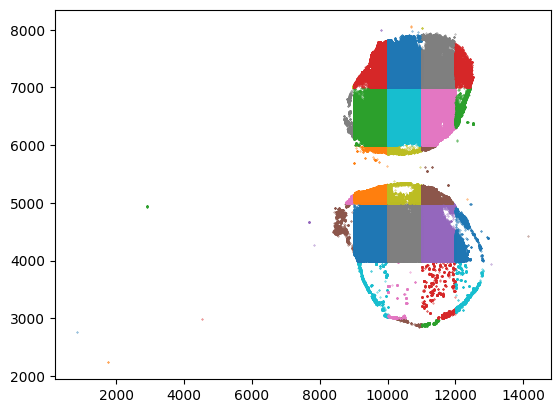

341880_413020_003920.tif
loaded:  341880_413020_003920.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_003920.tif
min, max:  0 9879


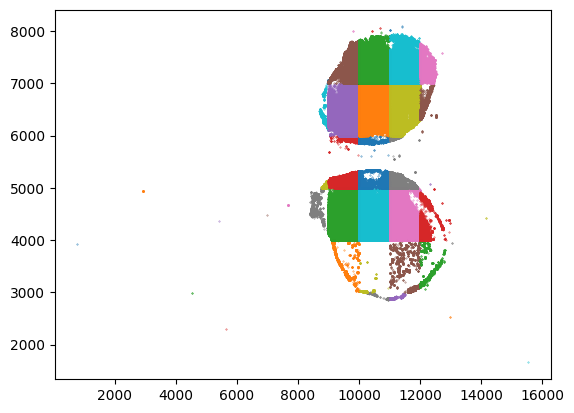

341880_413020_004000.tif
loaded:  341880_413020_004000.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004000.tif
min, max:  0 9950


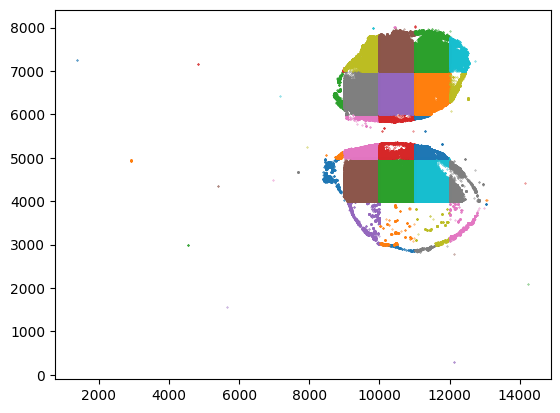

341880_413020_004080.tif
loaded:  341880_413020_004080.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004080.tif
min, max:  0 21004


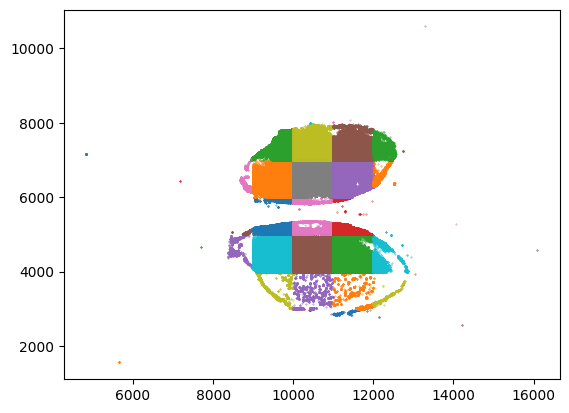

341880_413020_004120.tif
loaded:  341880_413020_004120.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004120.tif
min, max:  0 14971


KeyboardInterrupt: 

In [14]:
# Testing on a full folder

for identifier in file_list:
    
    print(identifier)
    
    neun_img, cfos_img = load(identifier)
    
    positions = process_slice(cfos_img)
    
    plt.clf()
    
    for pos in positions:
        if len(pos > 0):
            pos_arr = np.asarray(pos)

            plt.scatter(x=pos_arr[:,0], y=pos_arr[:,1], s=0.1)

    plt.show()

loaded:  341880_413020_003880.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_003880.tif
min, max:  0 16721
341880_413020_003880.tif


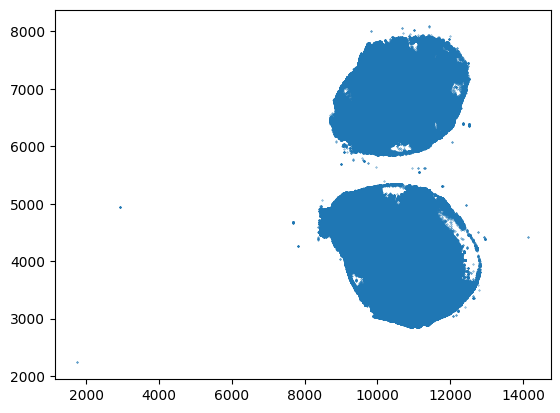

loaded:  341880_413020_003920.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_003920.tif
min, max:  0 9879
341880_413020_003920.tif


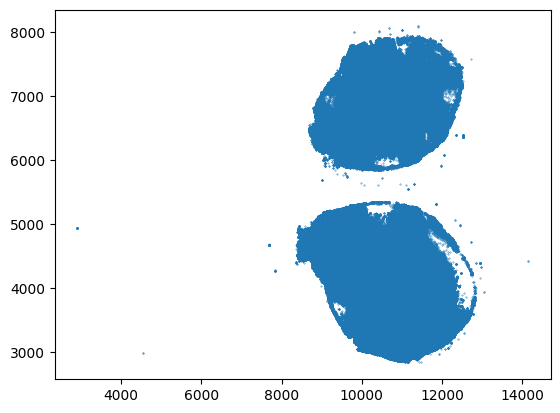

loaded:  341880_413020_004000.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004000.tif
min, max:  0 9950
341880_413020_004000.tif


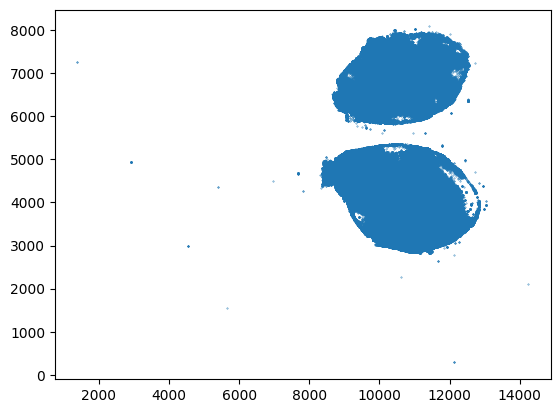

loaded:  341880_413020_004080.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004080.tif
min, max:  0 21004
341880_413020_004080.tif


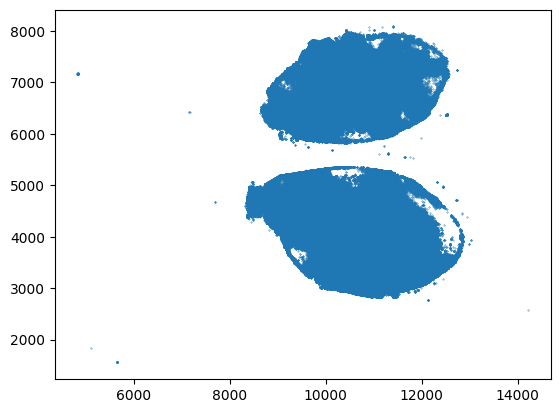

loaded:  341880_413020_004120.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004120.tif
min, max:  0 14971
341880_413020_004120.tif


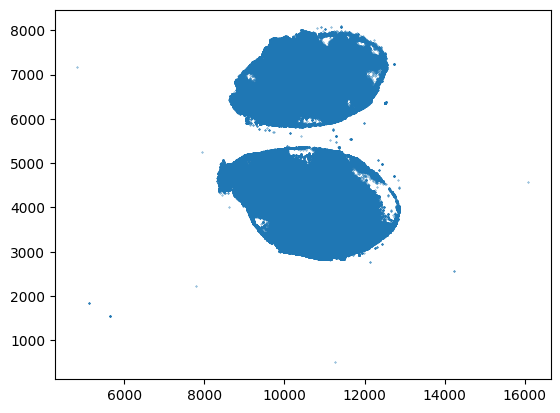

loaded:  341880_413020_004200.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004200.tif
min, max:  0 14738
341880_413020_004200.tif


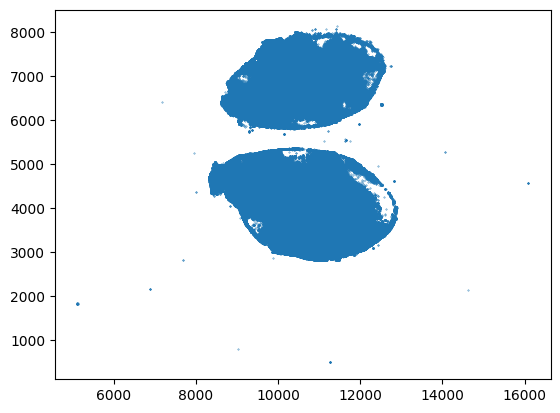

loaded:  341880_413020_004240.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004240.tif
min, max:  0 13404
341880_413020_004240.tif


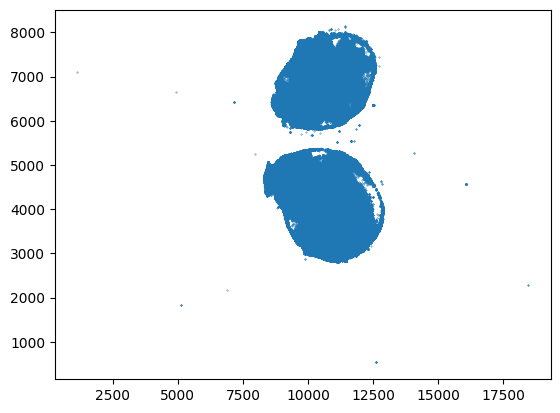

loaded:  341880_413020_004320.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004320.tif
min, max:  0 8965
341880_413020_004320.tif


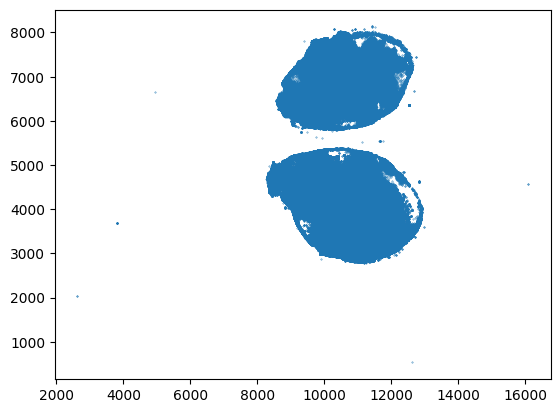

loaded:  341880_413020_004360.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004360.tif
min, max:  0 11953
341880_413020_004360.tif


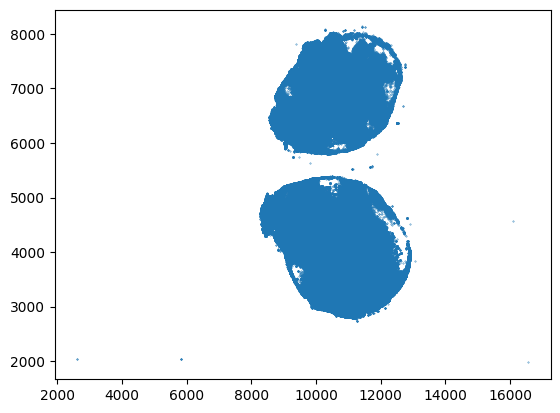

loaded:  341880_413020_004400.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004400.tif
min, max:  0 12036
341880_413020_004400.tif


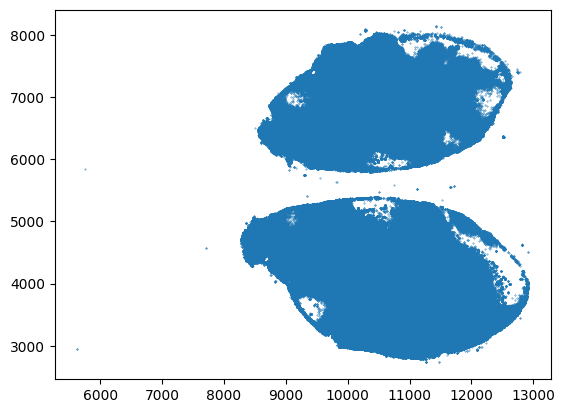

loaded:  341880_413020_004440.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004440.tif
min, max:  0 12404
341880_413020_004440.tif


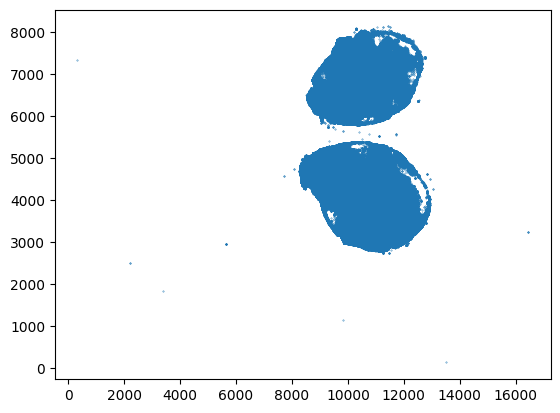

loaded:  341880_413020_004520.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004520.tif
min, max:  0 14908
341880_413020_004520.tif


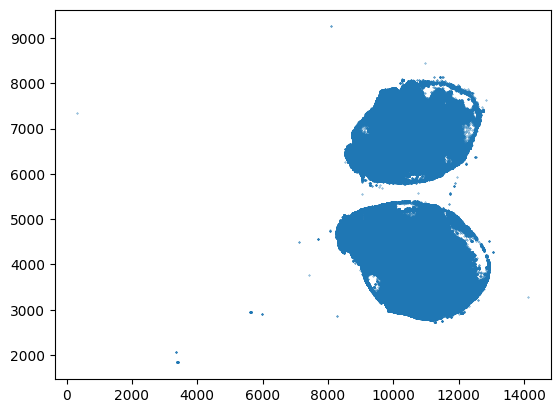

loaded:  341880_413020_004600.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004600.tif
min, max:  0 14420
341880_413020_004600.tif


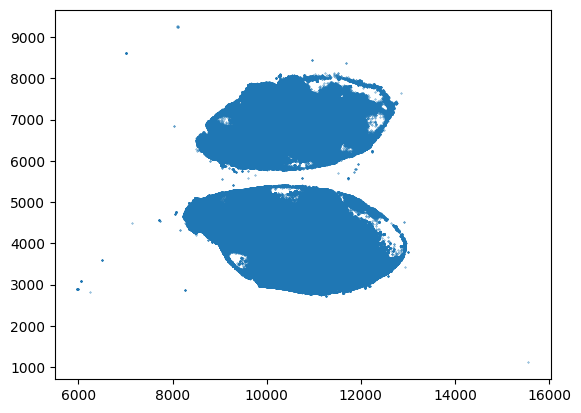

loaded:  341880_413020_004640.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004640.tif
min, max:  0 14119
341880_413020_004640.tif


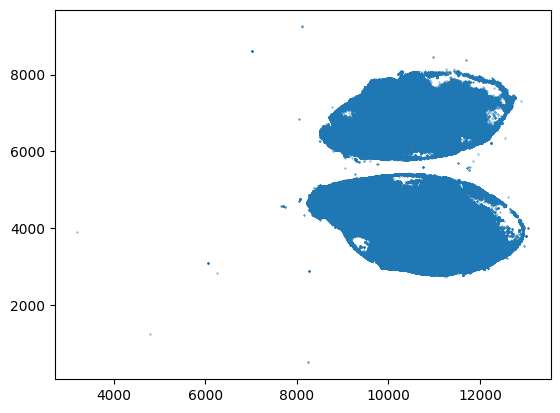

loaded:  341880_413020_004680.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004680.tif
min, max:  0 12400
341880_413020_004680.tif


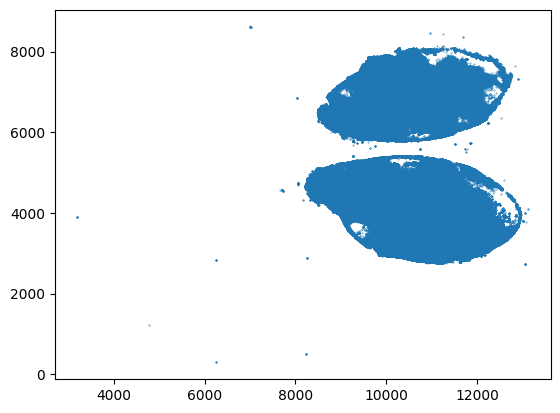

loaded:  341880_413020_004720.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004720.tif
min, max:  0 11557
341880_413020_004720.tif


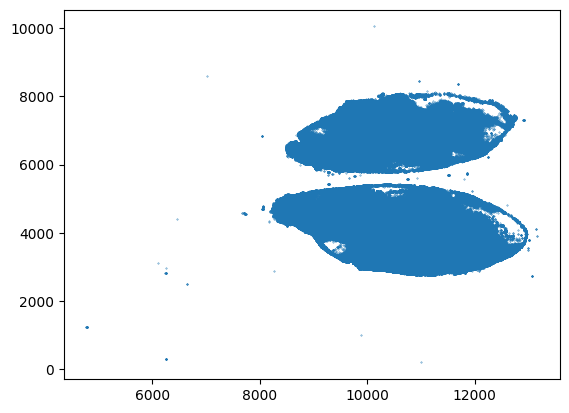

loaded:  341880_413020_004760.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004760.tif
min, max:  0 14019
341880_413020_004760.tif


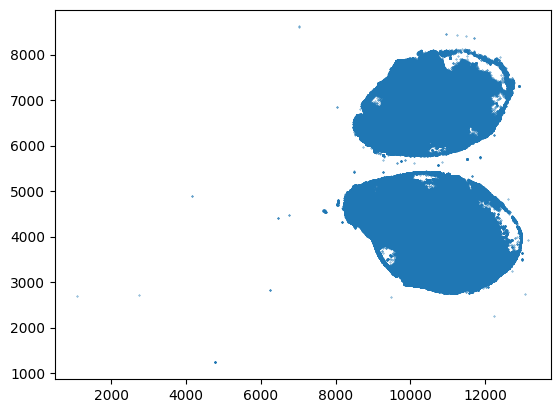

loaded:  341880_413020_004800.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004800.tif
min, max:  0 14904
341880_413020_004800.tif


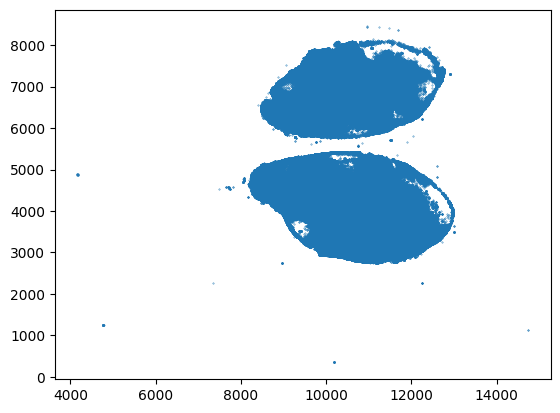

loaded:  341880_413020_004840.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004840.tif
min, max:  0 14434
341880_413020_004840.tif


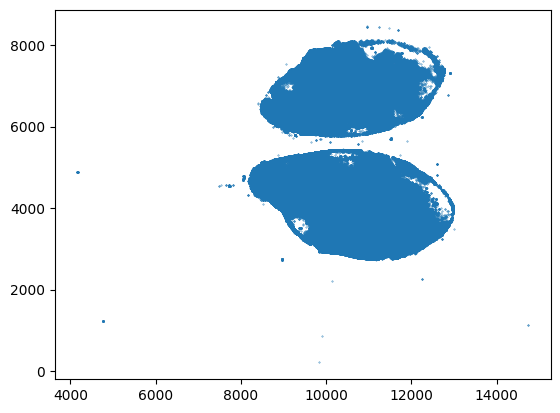

loaded:  341880_413020_004880.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004880.tif
min, max:  0 16009
341880_413020_004880.tif


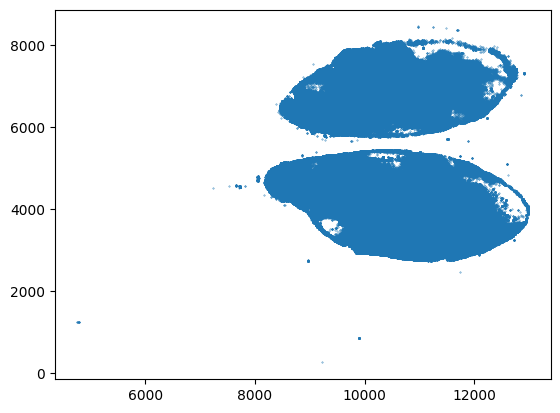

loaded:  341880_413020_004920.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_004920.tif
min, max:  0 10880
341880_413020_004920.tif


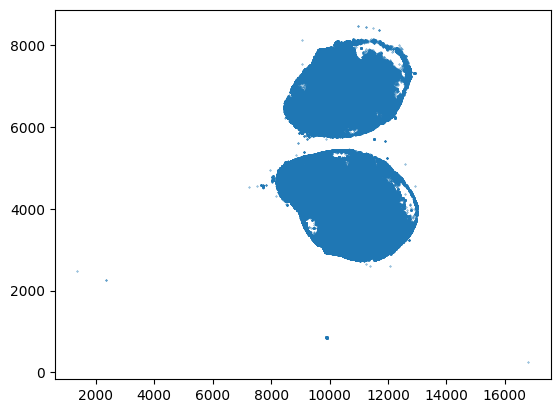

loaded:  341880_413020_005000.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_005000.tif
min, max:  0 14243
341880_413020_005000.tif


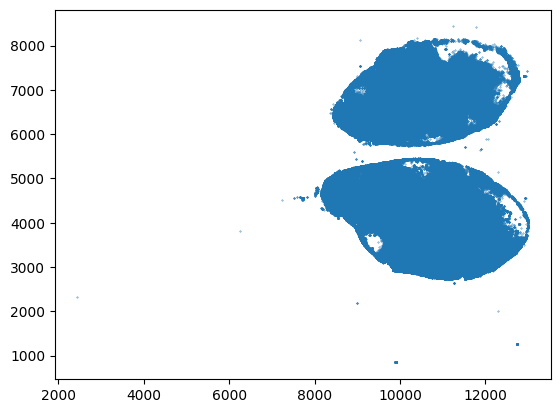

loaded:  341880_413020_005080.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_005080.tif
min, max:  0 25315
341880_413020_005080.tif


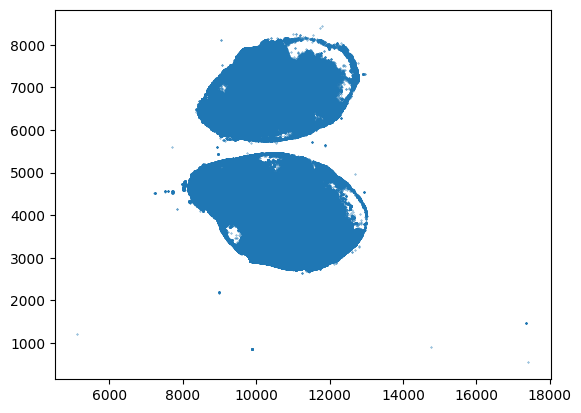

loaded:  341880_413020_005120.tif  from:  Z://Collaboration_data/Iordonova_lab/Iordanova_Control-M-R8_NeuN-cFOS-20230331T173106Z-001/Iordanova_Control-M-R8_NeuN-cFOS/Iordanova_Control-M-R8_cFOS/341880_413020_005120.tif
min, max:  0 19712
341880_413020_005120.tif


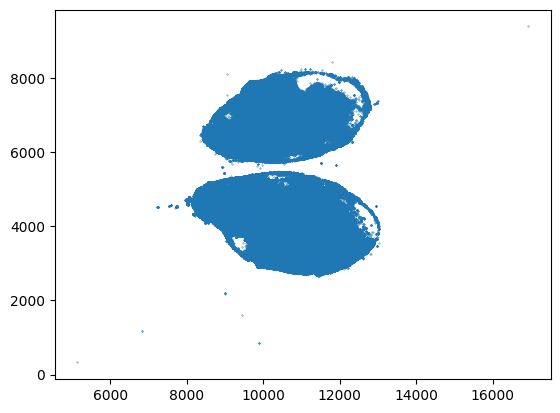

In [9]:
# Alternatively, what if we process the whole slice at once... 
# background_value = 100

position_list = []

for i, identifier in enumerate(file_list):
    neun_img, cfos_img = load(identifier)

    full_img = cfos_img - background_value
    full_img[full_img < 0] = 0
    
    print(identifier)

    processed_image = top_hat_transform(full_img)
    segmented_image, positions = segment_image(processed_image, 0, 0,method='otsu')
    
    positions = np.insert(positions, 2, i, axis=1)
    
    position_list.append(positions)    
        
    plt.clf()

    plt.scatter(x=positions[:,0], y=positions[:,1], s=0.1)

    plt.show()
    
    

In [11]:
position_list[1]

array([[ 2916,  4937,     1],
       [ 2916,  4938,     1],
       [ 2916,  4939,     1],
       ...,
       [13036,  3936,     1],
       [14145,  4425,     1],
       [14146,  4425,     1]], dtype=int64)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# # Sample data: list of NumPy arrays
# arrays_list = [
#     np.array([[1, 2, 3], [4, 5, 6]]),
#     np.array([[7, 8, 9], [10, 11, 12]])
# ]

# Combine all arrays into a single NumPy array
data = np.vstack(position_list)

# Extract x, y, and z coordinates from the combined data array
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


KeyboardInterrupt: 

In [15]:
# Save the point cloud of cell positions to be used in Blender, 
np.save('Z://Collaboration_data/Iordonova_lab/sample.npy', data)

In [16]:
data.shape

(146940132, 3)